# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from apiKeys import openWeatherKey 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "outputData/citiesData.csv"

# Range of latitudes and longitudes
latRange = (-90, 90)
lngRange = (-180, 180)

# Setting URL and unit for later API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
queryUrl = f"{url}appid={openWeatherKey}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
latLngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
lngs = np.random.uniform(lngRange[0], lngRange[1], size=1500)
latLngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for latLng in latLngs:
    city = citipy.nearest_city(latLng[0], latLng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating lists to output my data into
cityName = []
cloudiness = []
country = []
date = []
humidity = []
cityLat = []
cityLng = []
maxTemp = []
windSpeed = []

#Setting up my loop to go through my API calls
for city in cities:
    response = requests.get(queryUrl + city).json()
    
    try:
        #Appending the data for my dataframe into lists
        cityName.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        cityLat.append(response['coord']['lat'])
        cityLng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        print(f"Getting Weather Data for City {(cities.index(city) + 1)}: {response['name']}.")
    
    except KeyError:
        print("Can't find weather data for this city")
    
    time.sleep(1.0)

Getting Weather Data for City 1: Bluff.
Getting Weather Data for City 2: Barrow.
Getting Weather Data for City 3: Pidhorodne.
Getting Weather Data for City 4: Novoagansk.
Getting Weather Data for City 5: Busselton.
Getting Weather Data for City 6: Nichinan.
Getting Weather Data for City 7: Jamestown.
Getting Weather Data for City 8: Novopokrovka.
Getting Weather Data for City 9: Lukulu.
Getting Weather Data for City 10: Rikitea.
Getting Weather Data for City 11: Chui.
Getting Weather Data for City 12: Zhigalovo.
Getting Weather Data for City 13: Pochutla.
Getting Weather Data for City 14: Tasiilaq.
Getting Weather Data for City 15: Khatanga.
Getting Weather Data for City 16: Albany.
Getting Weather Data for City 17: Kikwit.
Getting Weather Data for City 18: Fredericton.
Getting Weather Data for City 19: Hobart.
Getting Weather Data for City 20: Atuona.
Getting Weather Data for City 21: Yellowknife.
Getting Weather Data for City 22: La Romana.
Getting Weather Data for City 23: Puerto Ay

Getting Weather Data for City 186: Cabo San Lucas.
Getting Weather Data for City 187: Maceió.
Getting Weather Data for City 188: Vilhena.
Getting Weather Data for City 189: Bathsheba.
Getting Weather Data for City 190: Tautira.
Getting Weather Data for City 191: Klaksvík.
Getting Weather Data for City 192: Codrington.
Can't find weather data for this city
Getting Weather Data for City 194: Arrondissement de Moulins.
Getting Weather Data for City 195: Norman Wells.
Getting Weather Data for City 196: Tiarei.
Getting Weather Data for City 197: Aksarka.
Getting Weather Data for City 198: Knysna.
Can't find weather data for this city
Getting Weather Data for City 200: Anadyr.
Getting Weather Data for City 201: Dębno.
Getting Weather Data for City 202: Zhigansk.
Getting Weather Data for City 203: Manadhoo.
Can't find weather data for this city
Getting Weather Data for City 205: Grindavik.
Getting Weather Data for City 206: Morant Bay.
Getting Weather Data for City 207: Ossora.
Getting Weathe

Getting Weather Data for City 369: Manono.
Can't find weather data for this city
Getting Weather Data for City 371: Soverato Marina.
Getting Weather Data for City 372: Tshikapa.
Getting Weather Data for City 373: Mackay.
Getting Weather Data for City 374: Chegdomyn.
Getting Weather Data for City 375: San Andrés.
Can't find weather data for this city
Getting Weather Data for City 377: Doka.
Getting Weather Data for City 378: Kovdor.
Getting Weather Data for City 379: Bengkulu.
Getting Weather Data for City 380: Hay River.
Getting Weather Data for City 381: Tete.
Getting Weather Data for City 382: Dunedin.
Getting Weather Data for City 383: Mayumba.
Getting Weather Data for City 384: Mandapeta.
Getting Weather Data for City 385: São Filipe.
Getting Weather Data for City 386: Sawākin.
Getting Weather Data for City 387: Ayagoz.
Getting Weather Data for City 388: Payakumbuh.
Getting Weather Data for City 389: Bitung.
Getting Weather Data for City 390: Nelson Bay.
Getting Weather Data for Ci

Getting Weather Data for City 553: Najrān.
Can't find weather data for this city
Getting Weather Data for City 555: Jiuquan.
Getting Weather Data for City 556: Santa Cruz de la Sierra.
Getting Weather Data for City 557: Aromashevo.
Getting Weather Data for City 558: Sarangani.
Getting Weather Data for City 559: Domoni.
Getting Weather Data for City 560: Issaquah.
Getting Weather Data for City 561: Calabaca.
Getting Weather Data for City 562: Luanda.
Can't find weather data for this city
Getting Weather Data for City 564: Karla.
Getting Weather Data for City 565: Mabaruma.
Getting Weather Data for City 566: Katsuura.
Getting Weather Data for City 567: Santa Vitória do Palmar.
Can't find weather data for this city
Getting Weather Data for City 569: Constitución.
Getting Weather Data for City 570: Kashgar.
Getting Weather Data for City 571: Kahului.
Can't find weather data for this city
Getting Weather Data for City 573: Galle.
Getting Weather Data for City 574: Lat Yao.
Getting Weather D

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#making my dataframe
weatherDataDf = pd.DataFrame({"City": cityName, "Cloudiness": cloudiness, "Country": country,
                             "Date": date, "Humidity": humidity, "Lat": cityLat, 
                             "Lng": cityLng, "Max Temp": maxTemp, "Wind Speed": windSpeed})
#outputting dataframe to csv
weatherDataDf.to_csv(outputDataFile)

weatherDataDf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,16,NZ,1607137518,73,-46.60,168.33,59.00,18.01
1,Barrow,90,US,1607137519,85,71.29,-156.79,10.40,18.34
2,Pidhorodne,90,UA,1607137521,74,48.58,35.11,28.40,15.66
3,Novoagansk,100,RU,1607137522,95,61.94,76.66,10.42,12.33
4,Busselton,29,AU,1607137392,52,-33.65,115.33,64.99,5.99
...,...,...,...,...,...,...,...,...,...
554,Waverly,90,US,1607138133,74,42.74,-84.62,37.99,4.70
555,Verāval,0,IN,1607138182,44,20.90,70.37,75.06,7.96
556,Nicolás Bravo,100,MX,1607138183,98,18.45,-88.92,70.86,2.59
557,Rundu,100,NA,1607138184,83,-17.93,19.77,67.66,1.03


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#Checking for any cities with humidity higher than 100
highHumidity = weatherDataDf.loc[(weatherDataDf["Humidity"] > 100)]

highHumidity 
#No cities with high than 100% humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

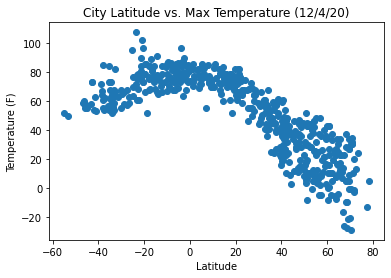

In [29]:
plt.scatter(weatherDataDf["Lat"], weatherDataDf["Max Temp"])

plt.title("City Latitude vs. Max Temperature (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Temperature (F)")

plt.savefig("outputData/latVsTemp.png")



## Latitude vs. Humidity Plot

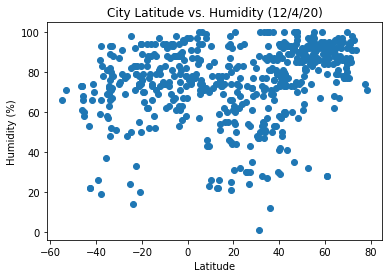

In [30]:
plt.scatter(weatherDataDf["Lat"], weatherDataDf["Humidity"])

plt.title("City Latitude vs. Humidity (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("outputData/latVsHum.png")

## Latitude vs. Cloudiness Plot

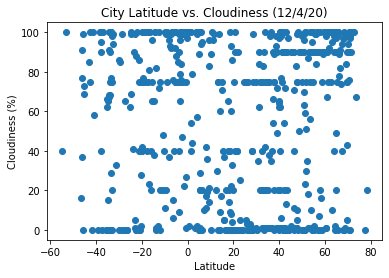

In [31]:
plt.scatter(weatherDataDf["Lat"], weatherDataDf["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("outputData/latVsCloud.png")

## Latitude vs. Wind Speed Plot

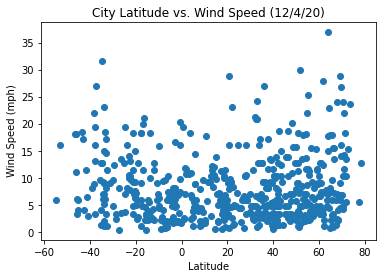

In [32]:
plt.scatter(weatherDataDf["Lat"], weatherDataDf["Wind Speed"])

plt.title("City Latitude vs. Wind Speed (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel(" Wind Speed (mph)")

plt.savefig("outputData/latVsWind.png")

## Linear Regression

In [33]:
#Dividing my data into northern and southern hempishperes
northHem = weatherDataDf.loc[(weatherDataDf["Lat"] > 0)]

southHem = weatherDataDf.loc[(weatherDataDf["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7537756617161346


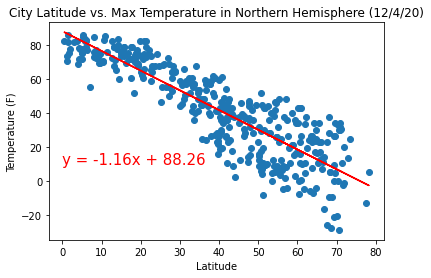

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem["Lat"],northHem["Max Temp"])

regressValues = (northHem["Lat"]) * slope + intercept

lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem["Lat"],northHem["Max Temp"])

plt.plot((northHem["Lat"]),regressValues,"r-")

plt.title("City Latitude vs. Max Temperature in Northern Hemisphere (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Temperature (F)")

plt.annotate(lineEq,(0,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("outputData/northLatVsTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12497508799018159


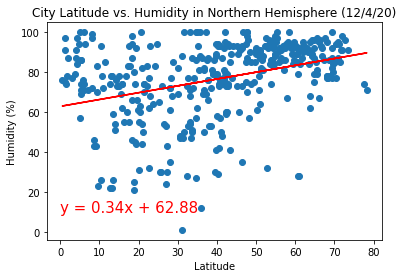

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem["Lat"],northHem["Humidity"])

regressValues = (northHem["Lat"]) * slope + intercept

lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem["Lat"],northHem["Humidity"])

plt.plot((northHem["Lat"]),regressValues,"r-")

plt.title("City Latitude vs. Humidity in Northern Hemisphere (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.annotate(lineEq,(0,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("outputData/northLatVsHum.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07145414797672692


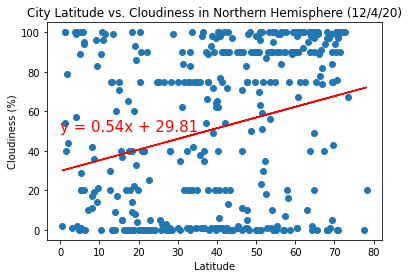

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem["Lat"],northHem["Cloudiness"])

regressValues = (northHem["Lat"]) * slope + intercept

lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem["Lat"],northHem["Cloudiness"])

plt.plot((northHem["Lat"]),regressValues,"r-")

plt.title("City Latitude vs. Cloudiness in Northern Hemisphere (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.annotate(lineEq,(0,50),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("outputData/northLatVsCloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02771477637861161


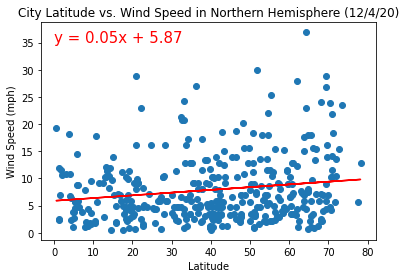

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northHem["Lat"],northHem["Wind Speed"])

regressValues = (northHem["Lat"]) * slope + intercept

lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem["Lat"],northHem["Wind Speed"])

plt.plot((northHem["Lat"]),regressValues,"r-")

plt.title("City Latitude vs. Wind Speed in Northern Hemisphere (12/4/20)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.annotate(lineEq,(0,35),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("outputData/northLatVsWind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression